# Supplementary Figure 2, Activation markers by flow cytometry

In Supplementary Figure 2, we plot activation marker expression (CD25 and CD69) over the course of 72 hours. Here, we'll generate plots for use in figure panels based on data stored in `06-flow-cytometry/data/`. 

The files involved in this analysis are not stored in HISE, so sources will be retrieved from within this git repository.

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
activation_data <- read.csv("../06-flow-cytometry/data/bor-len-dex_separate_CD25-CD69_bin-counts.csv")

In [3]:
out_dir <- "output/supp_figure_2"
dir.create(out_dir)

## CD25 expression

In [4]:
plot_data <- activation_data %>%
  mutate(perc_cd25 = as.numeric(perc_cd25))

In [5]:
plot_data <- plot_data %>%
  mutate(supplements = ifelse(supplements == "none", "-", "+"))

In [6]:
plot_data <- plot_data %>%
  mutate(group = paste0(drug, "_",dose_nM)) %>%
  mutate(lt = ifelse(supplements == "+", "solid", "dashed")) %>%
  mutate(drug_label = case_when(
      drug == "Bortezomib" ~ paste0("Bortezomib, ", dose_nM, "nM"),
      drug == "Lenalidomide" ~ paste0("Lenalidomide, ", dose_nM, "nM"),
      drug == "Dexamethasone" ~ paste0("Dexamethasone, ", dose_nM, "nM"),
      TRUE ~ "DMSO Only"
  ))

In [7]:
head(plot_data)

,population,drug,dose_nM,supplements,time_hr,n_cd25,perc_cd25,n_cd69,perc_cd69,group,lt,drug_label
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,CD8,Bortezomib,1.0,-,24,468,3.86,1143,9.42,Bortezomib_1,dashed,"Bortezomib, 1nM"
2,CD8,Bortezomib,2.5,-,24,519,4.32,1917,15.90,Bortezomib_2.5,dashed,"Bortezomib, 2.5nM"
3,CD8,Bortezomib,5.0,-,24,633,5.43,2727,23.40,Bortezomib_5,dashed,"Bortezomib, 5nM"
4,CD8,Bortezomib,1.0,+,24,1190,9.49,1391,11.10,Bortezomib_1,solid,"Bortezomib, 1nM"
5,CD8,Bortezomib,2.5,+,24,2176,17.60,1906,15.50,Bortezomib_2.5,solid,"Bortezomib, 2.5nM"
6,CD8,Bortezomib,5.0,+,24,2465,20.40,2051,17.00,Bortezomib_5,solid,"Bortezomib, 5nM"


In [8]:
control_data <- plot_data %>%
  filter(drug == "DMSO") %>%
  select(-group, -drug_label)

In [9]:
control_data

population,drug,dose_nM,supplements,time_hr,n_cd25,perc_cd25,n_cd69,perc_cd69,lt
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>
CD8,DMSO,0,-,24,367,2.95,442,3.56,dashed
CD8,DMSO,0,+,24,658,5.10,903,7.00,solid
CD8,DMSO,0,-,48,612,4.96,717,5.82,dashed
CD8,DMSO,0,+,48,733,5.69,1561,12.10,solid
CD8,DMSO,0,-,72,204,1.86,59,0.54,dashed
CD8,DMSO,0,+,72,298,3.70,792,9.84,solid
CD4,DMSO,0,-,24,2632,6.12,520,1.21,dashed
CD4,DMSO,0,+,24,11433,26.00,2724,6.20,solid
CD4,DMSO,0,-,48,3327,7.88,884,2.09,dashed


In [10]:
cd4_plot_data <- plot_data %>%
  filter(population == "CD4")
cd4_control_data <- control_data %>%
  filter(population == "CD4")

In [11]:
cd4_control_data

population,drug,dose_nM,supplements,time_hr,n_cd25,perc_cd25,n_cd69,perc_cd69,lt
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>
CD4,DMSO,0,-,24,2632,6.12,520,1.21,dashed
CD4,DMSO,0,+,24,11433,26.00,2724,6.20,solid
CD4,DMSO,0,-,48,3327,7.88,884,2.09,dashed
CD4,DMSO,0,+,48,18638,42.00,4453,10.00,solid
CD4,DMSO,0,-,72,1722,4.34,95,0.24,dashed
CD4,DMSO,0,+,72,7721,26.20,1580,1.53,solid


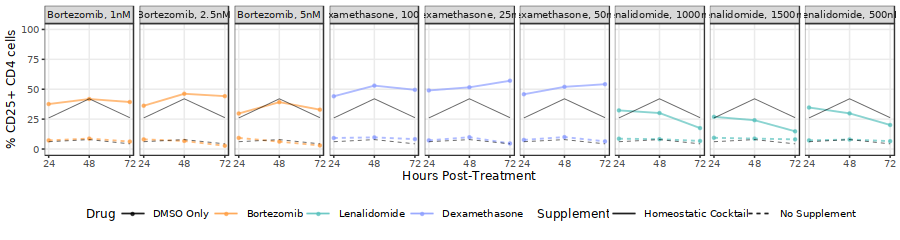

In [12]:
options(repr.plot.width = 7.5, repr.plot.height = 2)
p <- ggplot() +
  geom_line(data = cd4_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd25,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.4,
            alpha = 0.7) +
  geom_point(data = cd4_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd25,
               group = supplements,
               color = drug),
            alpha = 0.7,
            size = 0.2) +
  geom_line(data = cd4_control_data,
           aes(x = time_hr,
               y = perc_cd25,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.2,
            alpha = 0.6) +
  facet_wrap(~ drug_label, nrow = 1) +
  scale_color_manual("Drug",
                     breaks = c("DMSO", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     labels = c("DMSO Only", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     values = c("black", "#FF9F45", "#59C1BD", "#8D9EFF")) +
  scale_linetype_manual("Supplement",
                        breaks = c("+", "-"),
                        labels = c("Homeostatic Cocktail",
                                   "No Supplement"),
                        values = c("solid", "dashed")) +
  scale_y_continuous("% CD25+ CD4 cells",
                     limits = c(0, 100)) +
  scale_x_continuous("Hours Post-Treatment",
                     breaks = seq(0, 72, 24)) +
  theme_bw(base_size = 7) +
  theme(legend.position = "bottom",
        panel.grid.minor = element_blank())
p

In [13]:
out_file <- file.path(
    out_dir,
    paste0("treat_cd25_activation_cd4_line_plots_", Sys.Date(), ".pdf")
)
ggsave(
    out_file,
    p,
    width = 7.5, height = 2
)

In [14]:
cd8_plot_data <- plot_data %>%
  filter(population == "CD8")
cd8_control_data <- control_data %>%
  filter(population == "CD8")

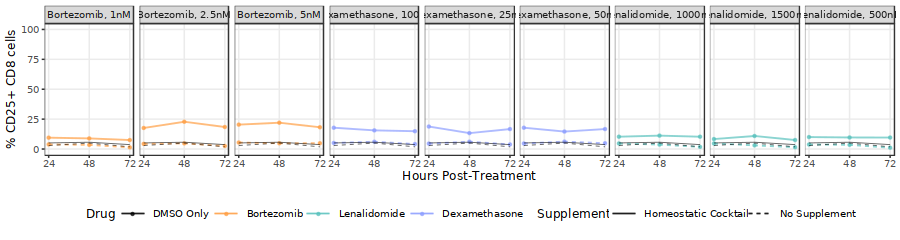

In [15]:
options(repr.plot.width = 7.5, repr.plot.height = 2)
p <- ggplot() +
  geom_line(data = cd8_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd25,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.4,
            alpha = 0.7) +
  geom_point(data = cd8_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd25,
               group = supplements,
               color = drug),
            alpha = 0.7,
            size = 0.2) +
  geom_line(data = cd8_control_data,
           aes(x = time_hr,
               y = perc_cd25,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.2,
            alpha = 0.6) +
  facet_wrap(~ drug_label, nrow = 1) +
  scale_color_manual("Drug",
                     breaks = c("DMSO", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     labels = c("DMSO Only", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     values = c("black", "#FF9F45", "#59C1BD", "#8D9EFF")) +
  scale_linetype_manual("Supplement",
                        breaks = c("+", "-"),
                        labels = c("Homeostatic Cocktail",
                                   "No Supplement"),
                        values = c("solid", "dashed")) +
  scale_y_continuous("% CD25+ CD8 cells",
                     limits = c(0, 100)) +
  scale_x_continuous("Hours Post-Treatment",
                     breaks = seq(0, 72, 24)) +
  theme_bw(base_size = 7) +
  theme(legend.position = "bottom",
        panel.grid.minor = element_blank())
p

In [16]:
out_file <- file.path(
    out_dir,
    paste0("treat_cd25_activation_cd8_line_plots_", Sys.Date(), ".pdf")
)
ggsave(
    out_file,
    p,
    width = 7.5, height = 2
)

## CD69 expression

In [17]:
plot_data <- activation_data %>%
  mutate(perc_cd69 = as.numeric(perc_cd69))

In [18]:
plot_data <- plot_data %>%
  filter(supplements != "aCD3/aCD28")

In [19]:
plot_data <- plot_data %>%
  mutate(supplements = ifelse(supplements == "none", "-", "+"))

In [20]:
plot_data <- plot_data %>%
  mutate(group = paste0(drug, "_",dose_nM)) %>%
  mutate(lt = ifelse(supplements == "+", "solid", "dashed")) %>%
  mutate(drug_label = case_when(
      drug == "Bortezomib" ~ paste0("Bortezomib\n", dose_nM, "nM"),
      drug == "Lenalidomide" ~ paste0("Lenalidomide\n", dose_nM, "nM"),
      drug == "Dexamethasone" ~ paste0("Dexamethasone\n", dose_nM, "nM"),
      TRUE ~ "DMSO Only"
  ))

In [21]:
plot_data <- plot_data %>%
  mutate(drug_label = factor(
      drug_label,
      levels = c('Bortezomib\n1nM','Bortezomib\n2.5nM','Bortezomib\n5nM',
                 'Lenalidomide\n500nM','Lenalidomide\n1000nM','Lenalidomide\n1500nM',
                 'Dexamethasone\n25nM','Dexamethasone\n50nM','Dexamethasone\n100nM',
                 'DMSO Only')
  ))

In [22]:
cd4_plot_data <- plot_data %>%
  filter(population == "CD4")

In [23]:
head(cd4_plot_data)

,population,drug,dose_nM,supplements,time_hr,n_cd25,perc_cd25,n_cd69,perc_cd69,group,lt,drug_label
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<fct>
1,CD4,Bortezomib,1.0,-,24,3125,7.22,1337,3.09,Bortezomib_1,dashed,Bortezomib 1nM
2,CD4,Bortezomib,2.5,-,24,3467,8.07,2908,6.77,Bortezomib_2.5,dashed,Bortezomib 2.5nM
3,CD4,Bortezomib,5.0,-,24,3912,9.29,6026,14.30,Bortezomib_5,dashed,Bortezomib 5nM
4,CD4,Bortezomib,1.0,+,24,16356,37.60,3495,8.04,Bortezomib_1,solid,Bortezomib 1nM
5,CD4,Bortezomib,2.5,+,24,15700,36.20,4168,9.60,Bortezomib_2.5,solid,Bortezomib 2.5nM
6,CD4,Bortezomib,5.0,+,24,12769,29.70,4940,11.50,Bortezomib_5,solid,Bortezomib 5nM


In [24]:
cd4_control_data <- cd4_plot_data %>%
  filter(drug == "DMSO" & supplements == "-") %>%
  select(-drug_label)

In [25]:
cd4_control_data

population,drug,dose_nM,supplements,time_hr,n_cd25,perc_cd25,n_cd69,perc_cd69,group,lt
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>
CD4,DMSO,0,-,24,2632,6.12,520,1.21,DMSO_0,dashed
CD4,DMSO,0,-,48,3327,7.88,884,2.09,DMSO_0,dashed
CD4,DMSO,0,-,72,1722,4.34,95,0.24,DMSO_0,dashed


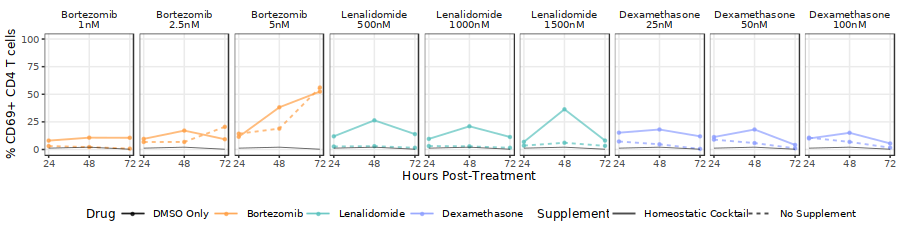

In [26]:
options(repr.plot.width = 7.5, repr.plot.height = 2)
p <- ggplot() +
  geom_line(data = cd4_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd69,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.4,
            alpha = 0.7) +
  geom_point(data = cd4_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd69,
               group = supplements,
               color = drug),
            alpha = 0.7,
            size = 0.2) +
  geom_line(data = cd4_control_data,
           aes(x = time_hr,
               y = perc_cd69,
               group = supplements,
               color = drug),
            linewidth = 0.2,
            alpha = 0.6) +
  facet_wrap(~ drug_label, nrow = 1) +
  scale_color_manual("Drug",
                     breaks = c("DMSO", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     labels = c("DMSO Only", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     values = c("black", "#FF9F45", "#59C1BD", "#8D9EFF")) +
  scale_linetype_manual("Supplement",
                        breaks = c("+", "-"),
                        labels = c("Homeostatic Cocktail",
                                   "No Supplement"),
                        values = c("solid", "dashed")) +
  scale_y_continuous("% CD69+ CD4 T cells",
                     limits = c(0, 100)) +
  scale_x_continuous("Hours Post-Treatment",
                     breaks = seq(0, 72, 24)) +
  theme_bw(base_size = 7) +
  theme(legend.position = "bottom",
        panel.grid.minor = element_blank(),
        strip.background = element_blank())
p

In [27]:
out_file <- file.path(
    out_dir,
    paste0("treat_cd69_activation_cd4_line_plots_", Sys.Date(), ".pdf")
)
ggsave(
    out_file,
    p,
    width = 7.5, height = 2
)

In [28]:
cd8_plot_data <- plot_data %>%
  filter(population == "CD8")

In [29]:
cd8_control_data <- cd8_plot_data %>%
  filter(drug == "DMSO" & supplements == "-") %>%
  select(-drug_label)

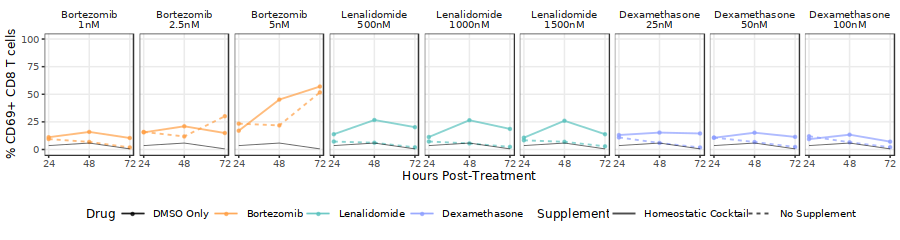

In [30]:
options(repr.plot.width = 7.5, repr.plot.height = 2)
p <- ggplot() +
  geom_line(data = cd8_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd69,
               group = supplements,
               linetype = supplements,
               color = drug),
            linewidth = 0.4,
            alpha = 0.7) +
  geom_point(data = cd8_plot_data %>% filter(drug != "DMSO"),
           aes(x = time_hr,
               y = perc_cd69,
               group = supplements,
               color = drug),
            alpha = 0.7,
            size = 0.2) +
  geom_line(data = cd8_control_data,
           aes(x = time_hr,
               y = perc_cd69,
               group = supplements,
               color = drug),
            linewidth = 0.2,
            alpha = 0.6) +
  facet_wrap(~ drug_label, nrow = 1) +
  scale_color_manual("Drug",
                     breaks = c("DMSO", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     labels = c("DMSO Only", "Bortezomib", "Lenalidomide", "Dexamethasone"),
                     values = c("black", "#FF9F45", "#59C1BD", "#8D9EFF")) +
  scale_linetype_manual("Supplement",
                        breaks = c("+", "-"),
                        labels = c("Homeostatic Cocktail",
                                   "No Supplement"),
                        values = c("solid", "dashed")) +
  scale_y_continuous("% CD69+ CD8 T cells",
                     limits = c(0, 100)) +
  scale_x_continuous("Hours Post-Treatment",
                     breaks = seq(0, 72, 24)) +
  theme_bw(base_size = 7) +
  theme(legend.position = "bottom",
        panel.grid.minor = element_blank(),
        strip.background = element_blank())
p

In [31]:
out_file <- file.path(
    out_dir,
    paste0("treat_cd69_activation_cd8_line_plots_", Sys.Date(), ".pdf")
)
ggsave(
    out_file,
    p,
    width = 7.5, height = 2
)

In [32]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.3 dplyr_1.1.3  

loaded via a namespace (and not attached):
 [1] crayon_1.5.2      vctrs_0.6.3       cli_3.6.1         rlang_1.1.1      
 [5] generics_0.1.3    textshaping_0.3.6 Cairo_1.6-1       jsonlite_1.8.7   
 [9] labeling_0.4.3    glue_1.6.2        colorspace_2.1-0  htmltools_0.5.6  
[13] I